<a href="https://colab.research.google.com/github/raamiiChu/NCCU_110-2_Applications-of-mathematics-softwares-homework/blob/main/0328_%E4%BD%9C%E6%A5%AD/0328_%E4%BD%9C%E6%A5%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=#FF0000>更改處皆以紅色字體標示在對應程式碼上方</font>

### 更改概要

1.   匯入 Adam 優化器

2.   修正 matplotlib 的繁體中文顯示異常
3.   filters 數量分別修改為 64, 128, 256
4.   loss function 修改為 "squared_hinge"
5.   優化器修改為 Adam
6.   learning rate 修改為 0.005
7.   batch size 修改為 600
8.   epochs 修改為 20
9.   預測結果資料型態轉換
10.  interact_manual 的呈現方式

### 資料正確率

執行時間：2022/4/3
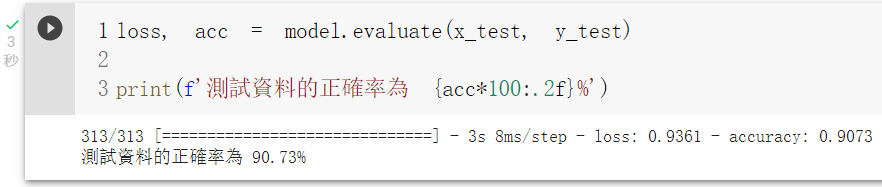

---

### 0. 匯入相關模組

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<font color=#FF0000>匯入 Adam 優化器</font> （原本是SDG）

In [ ]:
from tensorflow.keras.utils import to_categorical  # one hot encoding
from tensorflow.keras.models import Sequential  # 函數學習機
from tensorflow.keras.layers import Conv2D, MaxPooling2D  # 捲機層、MaxPooling
from tensorflow.keras.layers import Dense, Flatten  # 隱藏層、拉平
from tensorflow.keras.optimizers import Adam  # 優化器(學習方法)

#### <font color=#FF0000>修正 matplotlib 的繁體中文顯示異常</font>

異常原因：默認字型不支援中文 \
解決方法：下載並取代默認字型 \

程式碼參考來源：[蔡炎龍老師所提供的解決方法](https://nbviewer.org/github/yenlung/Deep-Learning-Basics/blob/master/colab99_%E5%9C%A8_matplotlib_%E4%B8%AD%E4%BD%BF%E7%94%A8%E4%B8%AD%E6%96%87.ipynb)

修正前後的差異比較： \
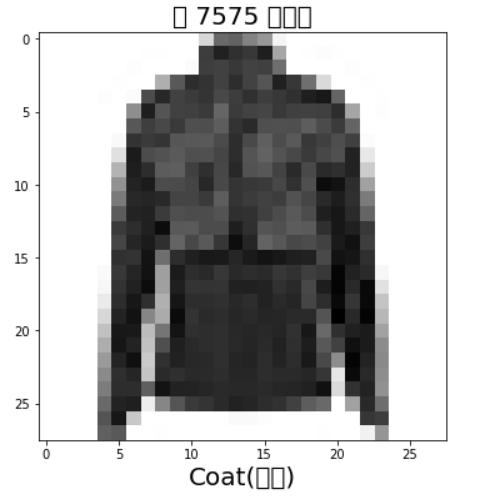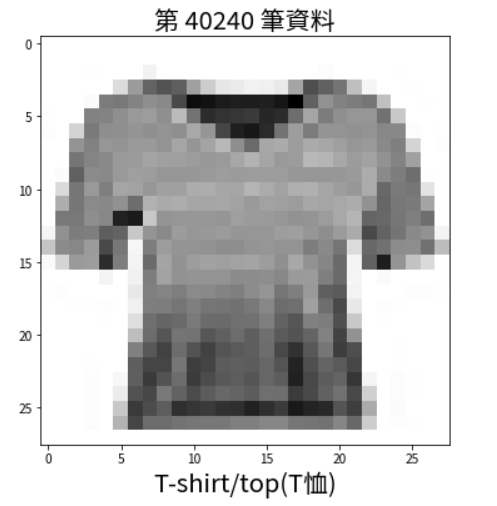

In [ ]:
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf') # 在 fontManager 中新增新的字型
mpl.rc('font', family='Taipei Sans TC Beta') # 修改 rcParams 的 "font" 屬性，將原本的字型變成 "台北黑體"

--2022-04-03 07:02:29--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.132.102, 74.125.132.101, 74.125.132.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.132.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/t72lc7fl056jaqbd9iauj2bbbq7hvdf0/1648969275000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2022-04-03 07:02:29--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/t72lc7fl056jaqbd9iauj2bbbq7hvdf0/1648969275000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 74.125.124.132, 2607:f8b0:4001:c14::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|74.125.124.132

### 1. 讀入 MNSIT 數據集

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### 1.5 檢視資料

In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape, sep="\n")

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
import random
labels = ["T-shirt/top(T恤)", "Trouser(褲子)", "Pullover(套衫)",
          "Dress(裙子)", "Coat(外套)", "Sandal(涼鞋)",
          "Shirt(汗衫)", "Sneaker(運動鞋)", "Bag(包)", "Ankle boot(踝靴)"]

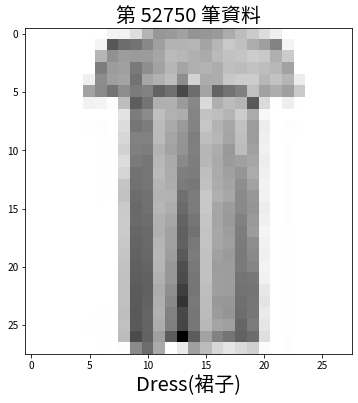

In [ ]:
n = random.randint(0,60000)

plt.figure(figsize=(6,6))

plt.title(f"第 {n} 筆資料", fontsize=20)
plt.xlabel(labels[y_train[n]], fontsize=20)

plt.imshow(x_train[n], cmap="Greys");

### 2. 資料整理

#### Channel

CNN 要注意一張圖有多少個 channel, 開始我們因為只有灰階, 所以只有一個 channel。因此我們要轉一下我們的資料格式:

    (28,28) --> (28, 28, 1)

In [ ]:
x_train = x_train.reshape(60000, 28, 28, 1) / 255
x_test = x_test.reshape(10000, 28, 28, 1) / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### 3. step 1: 打造函數學習機 (CNN)

*   <font color=#FF0000>filters 數量分別修改為 64, 128, 256</font>

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(64, (3,3), padding='same', # num of filters, size
                input_shape=(28,28,1),
                activation='relu'))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Conv2D(128, (3,3), padding='same',
                activation='relu'))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Conv2D(256, (3,3), padding='same',
                activation='relu'))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(256, activation='relu'))

In [ ]:
model.add(Dense(10, activation='softmax'))

#### 看一下我們的神經網路

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 256)         295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 256)        0

#### 組裝

[loss function 相關解釋文章（簡中）](https://blog.csdn.net/lyb3b3b/article/details/76962651)
*   <font color=#FF0000>loss function 修改為 "squared_hinge"</font>
*   <font color=#FF0000>優化器修改為 Adam</font>
*   <font color=#FF0000>learning rate 修改為 0.005</font>

In [ ]:
model.compile(loss='squared_hinge', optimizer=Adam(learning_rate=0.005),
             metrics=['accuracy'])

### 4. step 2: fit

*   <font color=#FF0000>batch size 修改為 600</font>
*   <font color=#FF0000>epochs 修改為 20</font>

In [ ]:
model.fit(x_train, y_train, batch_size=600, epochs=20)

Epoch 1/20
100/100 [==============================] - 10s 69ms/step - loss: 1.0243 - accuracy: 0.6574
Epoch 2/20
100/100 [==============================] - 7s 69ms/step - loss: 0.9486 - accuracy: 0.8715
Epoch 3/20
100/100 [==============================] - 7s 68ms/step - loss: 0.9398 - accuracy: 0.8949
Epoch 4/20
100/100 [==============================] - 7s 68ms/step - loss: 0.9362 - accuracy: 0.9051
Epoch 5/20
100/100 [==============================] - 7s 68ms/step - loss: 0.9340 - accuracy: 0.9115
Epoch 6/20
100/100 [==============================] - 7s 68ms/step - loss: 0.9318 - accuracy: 0.9165
Epoch 7/20
100/100 [==============================] - 7s 72ms/step - loss: 0.9306 - accuracy: 0.9199
Epoch 8/20
100/100 [==============================] - 7s 74ms/step - loss: 0.9309 - accuracy: 0.9193
Epoch 9/20
100/100 [==============================] - 7s 69ms/step - loss: 0.9286 - accuracy: 0.9255
Epoch 10/20
100/100 [==============================] - 7s 69ms/step - loss: 0.9274 - accur

### 5. Step 3: 預測

In [ ]:
y_predict = np.argmax(model.predict(x_test), axis=-1)

#### <font color=#FF0000>預測結果資料型態轉換</font>

將數字替換成對應的資料內容
```
predict_result = np.array([labels[y] for y in y_predict])
```
---
若看不懂 <font color=#FF0000>comprehension 語法</font>，可以將該程式碼理解成：
```
predict_result = []
for y in y_predict:
    a.append(labels[y])
predict_result = np.array(a)
```
---
相關介紹連結：\
[python 官方文件（英文）](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions) \
[w3schools（英文）](https://www.w3schools.com/python/python_lists_comprehension.asp)

In [ ]:
labels = ["T-shirt/top(T恤)", "Trouser(褲子)", "Pullover(套衫)",
          "Dress(裙子)", "Coat(外套)", "Sandal(涼鞋)",
          "Shirt(汗衫)", "Sneaker(運動鞋)", "Bag(包)", "Ankle boot(踝靴)"]

predict_result = np.array([labels[y] for y in y_predict])

In [ ]:
# 檢查用
print(y_predict[:5], predict_result[:5], sep="\n")

[9 2 1 1 6]
['Ankle boot(踝靴)' 'Pullover(套衫)' 'Trouser(褲子)' 'Trouser(褲子)' 'Shirt(汗衫)']


#### 看看測試資料表現如何

In [ ]:
loss, acc = model.evaluate(x_test, y_test)

print(f'測試資料的正確率為 {acc*100:.2f}%')

313/313 [==============================] - 2s 7ms/step - loss: 0.9367 - accuracy: 0.9071
測試資料的正確率為 90.71%


#### <font color=#FF0000>interact_manual 的呈現方式</font>

In [ ]:
from ipywidgets import interact_manual

def my_predict(n):
    X = x_test[n].reshape(28,28)

    plt.figure(figsize=(5,5))  #  設定圖表大小
    plt.title(f"第 {n} 筆資料", fontsize=18)  # 設定圖表標題以及文字大小
    plt.xlabel(f"預測結果：{predict_result[n]}", fontsize=18)  # 設定 x軸標籤以及文字大小
    
    plt.imshow(X, cmap='Greys');

In [ ]:
interact_manual(my_predict, n=(0, 9999));

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

### 6. 把我們的 model 存起來

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [ ]:
model.save('my_cnn_model')

INFO:tensorflow:Assets written to: my_cnn_model/assets
